In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Hotel bookings

# Veri Seti Hakkında Genel Bilgiler
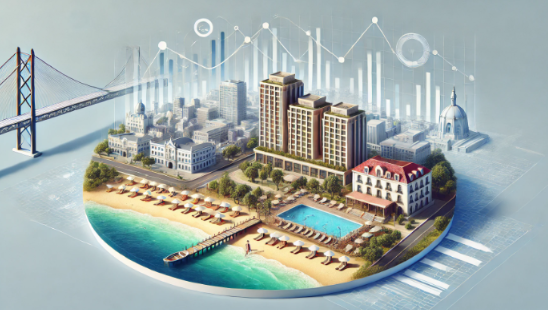

Bu veri setleri, 1 Temmuz 2015 ile 31 Ağustos 2017 tarihleri arasındaki 119.390 otel rezervasyonu hakkında bilgileri içermektedir. Her bir gözlem bir otel rezervasyonunu temsil etmektedir.

Veriler iki farklı otele aittir. Her iki otel de Portekiz'de bulunmaktadır: Resort Hotel, Algarve bölgesinde, City Hotel ise Lizbon şehrindedir.

Orijinal, ham veri seti hotel_bookings.csv dosyasında verilmiştir. bookings_2023.csv dosyası, 23 özelliğe sahip biraz daha sadeleştirilmiş bir versiyondur. bookings.csv dosyası ise analizlere yardımcı olmak amacıyla 10 sütuna indirgenmiş ve ön işleme tabi tutulmuştur.

Bu veri otantik bir otel verisi olduğundan, otel veya müşteri kimliğine ait tüm veri unsurları çıkarılmıştır.

# Kütüphanele

In [9]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Setlerinin Yüklenmesi

In [10]:
# Veri setini notebook içerisine dahil edelim.
import pandas as pd

# Veri setini okuma
df = pd.read_csv("/kaggle/input/hotel-bookings/hotel_bookings.csv")

Veri setinde rasgele eksik veriler oluşturalım.

In [16]:
import random

def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    """
    DataFrame'deki rastgele değerlere NaN ekleyerek eksik değerler yaratır.

    Args:
        dataframe (pd.DataFrame): İşlenecek DataFrame.
        missing_rate (float): Eksik değer oranı, varsayılan olarak %5.

    Returns:
        df_missing (pd.DataFrame): Eksik değerler içeren yeni DataFrame.
    """
    # DataFrame'in bir kopyasını alın
    df_missing = dataframe.copy()

    # DataFrame boyutunu ve eksik değer sayısını hesaplayın
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Rastgele satır ve sütun indekslerini seçerek NaN değerler atayın
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing


# 1. Veriye İlk Bakış

In [17]:
# Veri setine %3 oranında rastgele eksik değerler ekleyin
df_with_missing = add_random_missing_values(df, missing_rate=0.03)

In [18]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [19]:
# Sondan 3 gözlem için tail() metodu kullanılabilir.
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [21]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# 2. Eksik Veri Analizi

# 2.1 Eksik Verilerin Gözlemlenmesi

In [22]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [23]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [24]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 3691055 adet eksik olmayan, 129425 eksik gözlem var.


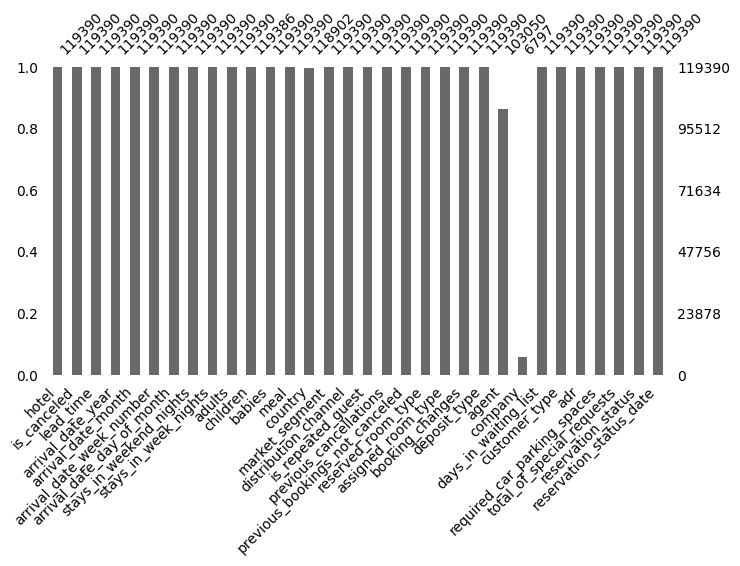

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

# 2.2 Yöntem 1: Eksik Verilerin Silinmesi

In [26]:
# Eksik verileri içeren satırları silme
df_dropped = df_with_missing.dropna()


In [27]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 2.3 Yöntem 2: Eksik Verilerin Doldurulması

In [28]:
# Sayısal sütunlardaki eksik değerleri medyan ile doldurma
df_filled = df_with_missing.copy()
numerical_cols = df_with_missing.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    median_value = df_filled[col].median()
    # 'inplace=True' kullanmak yerine doğrudan atama yapıyoruz
    df_filled[col] = df_filled[col].fillna(median_value)


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [30]:
# Temel istatistiksel bilgiler
df_with_missing.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,115903.000000,115848.000000,115886.000000,115694.000000,115853.000000,115858.000000,115870.000000,115867.000000,115880.000000,115862.000000,115816.000000,115968.000000,115898.000000,116015.000000,99892.000000,6580.000000,115846.000000,115786.000000,115948.000000,115865.000000
mean,0.369904,103.962036,2016.156059,27.162852,15.793920,0.928222,2.501303,1.856094,0.104177,0.007949,0.032025,0.086610,0.137034,0.220592,86.791034,189.702584,2.320581,101.859006,0.062528,0.571432
std,0.482781,106.853534,0.707437,13.606793,8.781877,0.999457,1.909136,0.570981,0.399155,0.097689,0.176067,0.837223,1.497989,0.652229,110.848734,131.643798,17.529544,50.614086,0.245333,0.792576
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.780000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


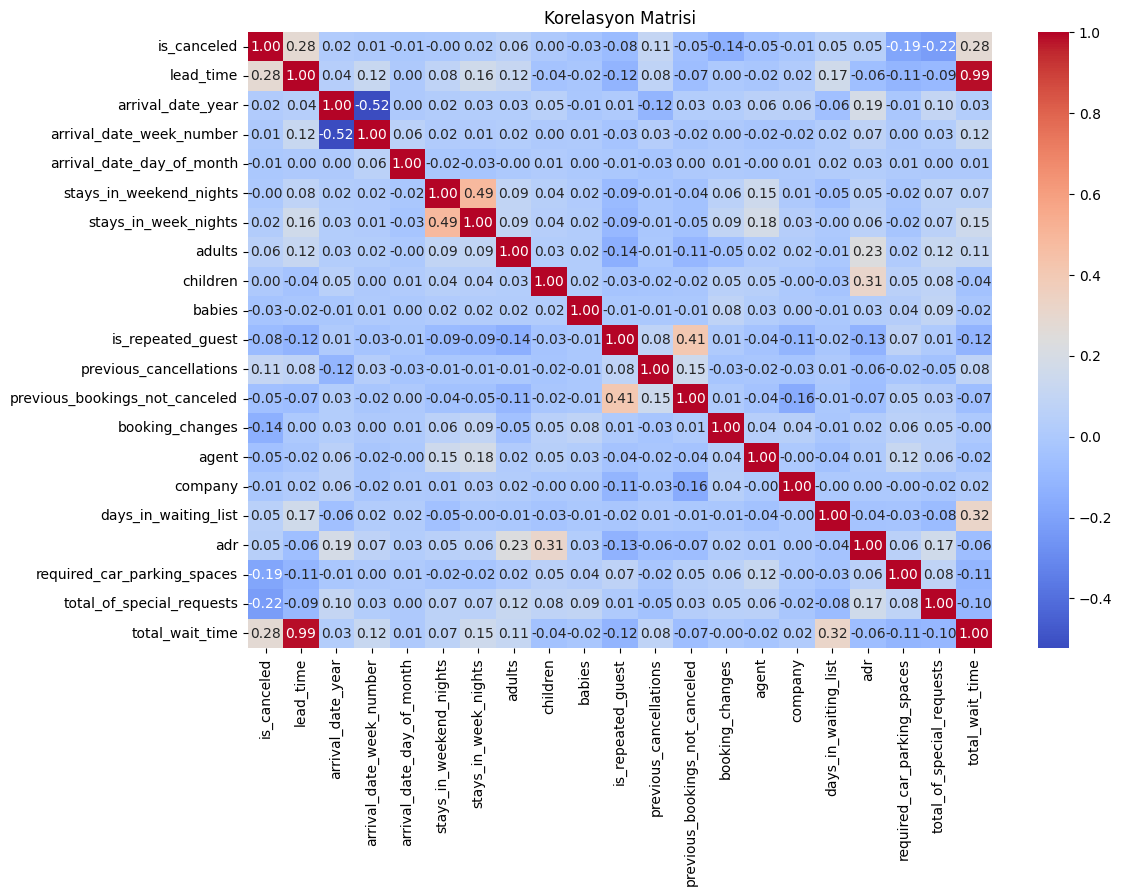

In [33]:
# Sayısal sütunları seçme
numerical_cols = df_filled.select_dtypes(include=['number']).columns

# Sayısal sütunlar ile korelasyon matrisini oluşturma
correlation_matrix = df_filled[numerical_cols].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()


In [34]:
# Yeni bir özellik oluşturma
df_filled['total_wait_time'] = df_filled['lead_time'] + df_filled['days_in_waiting_list']


In [35]:
# Sayısal sütunları seçme
numeric_df = df_filled.select_dtypes(include=['number'])

# Korelasyon matrisini hesaplama
correlation_matrix = numeric_df.corr()

# Korelasyonu yüksek olan özellikleri çıkarma
high_correlation = correlation_matrix.columns[abs(correlation_matrix).gt(0.8).any()]
df_reduced = df_filled.drop(columns=high_correlation)

# Yeni veri çerçevesini görüntüleme
print(df_reduced)


               hotel arrival_date_month meal country market_segment  \
0       Resort Hotel               July   BB     PRT         Direct   
1       Resort Hotel               July  NaN     PRT         Direct   
2                NaN               July   BB     GBR         Direct   
3       Resort Hotel               July   BB     GBR      Corporate   
4       Resort Hotel               July   BB     GBR      Online TA   
...              ...                ...  ...     ...            ...   
119385    City Hotel                NaN   BB     BEL  Offline TA/TO   
119386    City Hotel             August   BB     FRA      Online TA   
119387    City Hotel             August   BB     DEU      Online TA   
119388    City Hotel             August   BB     GBR      Online TA   
119389    City Hotel             August   HB     DEU      Online TA   

       distribution_channel reserved_room_type assigned_room_type  \
0                    Direct                  C                  C   
1        